 # Importing packages

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn import model_selection
from sklearn.linear_model import LinearRegression , LogisticRegression


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_excel('Data.xlsx')

In [4]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### INFERENCES :
1. There are 5000 rows in the data.
2. There are no null values present in the data.
3. There are no categorical variables in the given data set.
4. Some variables will be classified into category after the data analysis.
5. There are no duplicates entry present in the data.
6. Our Target variable is Personal_loan.. which makes this a classification problem.

# Exploratory Data Analysis.

### Univariate Analysis

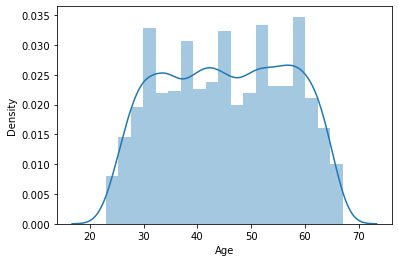

In [8]:
sns.distplot( df['Age']);

In [9]:
df['Experience'].value_counts(bins=5)

(15.4, 24.6]                  1184
(24.6, 33.8]                  1164
(6.2, 15.4]                   1086
(-3.0469999999999997, 6.2]     784
(33.8, 43.0]                   782
Name: Experience, dtype: int64

* As experience cannot  be in negative it can be typo error

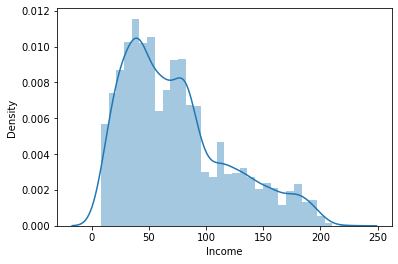

In [10]:
sns.distplot( df['Income']);

In [11]:
df['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

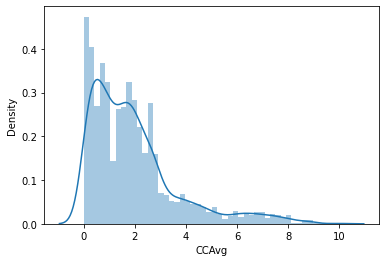

In [12]:
sns.distplot( df['CCAvg']);

In [13]:
df['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

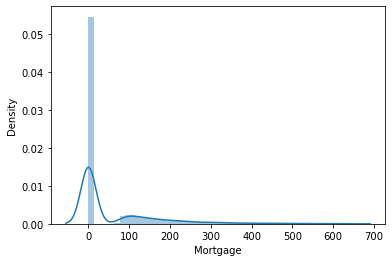

In [14]:
sns.distplot( df['Mortgage']);

In [15]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [16]:
df['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [17]:
df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [18]:
df['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [19]:
df['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

[64.0]

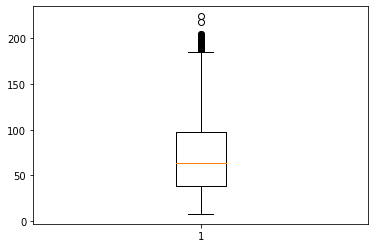

In [20]:
box = plt.boxplot(df['Income']);
[item.get_ydata()[0] for item in box['caps']]
[item.get_ydata()[0] for item in box['whiskers']]
[item.get_ydata()[0] for item in box['medians']]

In [21]:
[item.get_ydata()[0] for item in box['caps']]

[8.0, 185.0]

In [22]:
[item.get_ydata()[0] for item in box['whiskers']]

[39.0, 98.0]

In [23]:
[item.get_ydata()[0] for item in box['medians']]

[64.0]

### Bi-Variate Analysis

<AxesSubplot:xlabel='Experience', ylabel='Personal Loan'>

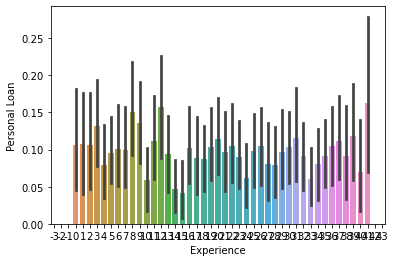

In [24]:
sns.barplot(df["Experience"] , df["Personal Loan"] )

<AxesSubplot:xlabel='Education', ylabel='Experience'>

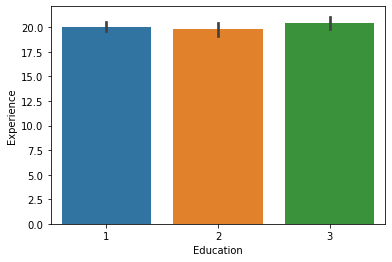

In [25]:
sns.barplot(y=df["Experience"] , x=df["Education"] )

<AxesSubplot:xlabel='Education', ylabel='Age'>

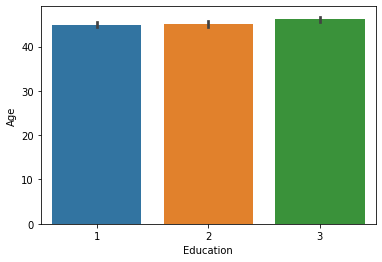

In [26]:
sns.barplot(y=df["Age"] , x=df["Education"] )

<AxesSubplot:xlabel='Income', ylabel='Age'>

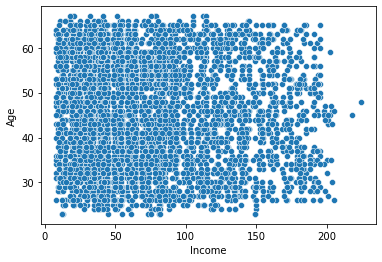

In [27]:
sns.scatterplot(y=df["Age"] , x=df["Income"] , data = df)

<AxesSubplot:xlabel='Personal Loan', ylabel='Age'>

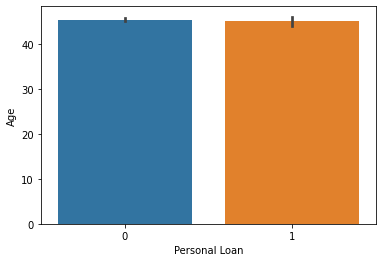

In [28]:
sns.barplot(y=df["Age"] , x=df["Personal Loan"] )

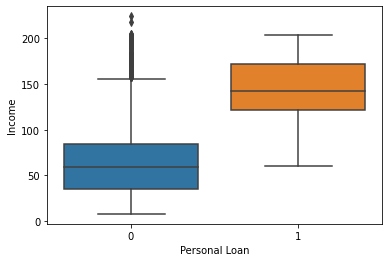

In [29]:
sns.boxplot(x = 'Personal Loan', y = 'Income', data = df);

* If the persons income is below 55K the chances of getting a personal is almost nill

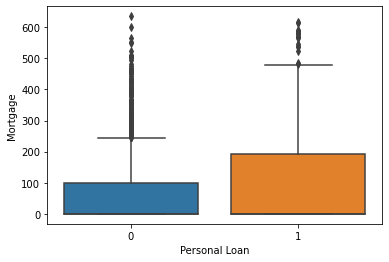

In [30]:
sns.boxplot(x = 'Personal Loan', y = 'Mortgage', data = df);

* There is no relationship with people who have taken Mortrage and personal loan

### Inferences of E.D.A

1. Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age. We can confirm    this by looking at the describe statement above, which shows mean is almost equal to median
2.  Experience is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to       median. There are negative values in the Experience. This could be a data input error as in general it is not possible to       measure negative years of experience. We can delete these values, because we have 3 or 4 records from the sample.
3. Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the      mean is greater than the median
4. CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K
5. Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K.
6. The variables family and education are ordinal variables. The distribution of families is evenly distributes.
7. The Experience v/s personal loan plot tells us that there is some fluctuations and not useless. maybe we can bin them.
8. The Age v/s Education tells us that for evry category the age group remains same.
9. The Experience v/s Education tells us that for every category the age group remains same.
10. The Age v/s income scatterplot is evenly distributed..
11. The Age column is useless/insignificant. To confirm my suspicion of multi co-linearity we will check v_i_f score.

## Checking Variance_inflation_factor

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [32]:
X = df.select_dtypes(np.number)

In [33]:
vif = pd.DataFrame()
vif['VIF_Factor'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['Features'] = X.columns
vif.sort_values('VIF_Factor', ascending=False).reset_index(drop=True)

,VIF_Factor,Features
0,1277.700751,Age
1,368.300781,ZIP Code
2,315.409136,Experience
3,7.862782,Income
4,7.213511,Education
5,5.686769,Family
6,4.009582,ID
7,3.873123,CCAvg
8,2.586460,Online
9,1.801703,Personal Loan


In [34]:
# Dropping insignificant and multi-colinearity columns. 
X = df.drop(['ID','ZIP Code','Personal Loan' , 'Age'],axis=1)

In [35]:
vif = pd.DataFrame()
vif['VIF_Factor'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['Features'] = X.columns
vif.sort_values('VIF_Factor', ascending=False).reset_index(drop=True)

,VIF_Factor,Features
0,5.661049,Income
1,4.396583,Education
2,4.104031,Family
3,3.831222,CCAvg
4,3.389831,Experience
5,2.376012,Online
6,1.513825,CreditCard
7,1.371026,Mortgage
8,1.363529,CD Account
9,1.248083,Securities Account


### Converting Personal Loan column to category 

In [36]:
df['Personal Loan'] = df['Personal Loan'] .astype('category')

## Train Test Split

In [37]:

# Putting feature variable to X
# X = df.drop(['ID','ZIP Code','Personal Loan' , 'Age'],axis=1)

# Putting response variable to y
y = df['Personal Loan']
    


In [38]:
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

### Inferences :

1. The v_i_f score for age is very high, as suspected the multi co-linearity was there.
2. As there was too many zip codes values which couldn't be treated.. so they were dropped.
3. As the id for every customer will be unique, hence no use for us.
4. As the personal loan was earlier in integer type so converting into category data type.
5. Splitting dataset to train the model and finally test predicted againt the actual results.

# Decision Tree

In [39]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [40]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1342
           1       0.96      0.87      0.91       158

    accuracy                           0.98      1500
   macro avg       0.97      0.93      0.95      1500
weighted avg       0.98      0.98      0.98      1500



In [41]:
print(confusion_matrix(y_test, y_pred_default))

[[1336    6]
 [  21  137]]


# Hyper Parameter tunning 

In [42]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [43]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [44]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006328,0.005256,0.004229,0.003105,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.970000,0.981429,0.970000,0.978571,0.985714,0.977143,0.006260,1
1,0.006210,0.003127,0.000000,0.000000,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.970000,0.981429,0.970000,0.978571,0.985714,0.977143,0.006260,1
4,0.007585,0.001493,0.000281,0.000563,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.970000,0.981429,0.970000,0.978571,0.985714,0.977143,0.006260,1
5,0.003537,0.006115,0.000000,0.000000,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.970000,0.981429,0.970000,0.978571,0.985714,0.977143,0.006260,1
8,0.001197,0.002394,0.003536,0.006123,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.965714,0.977143,0.964286,0.968571,0.968571,0.968857,0.004463,5


In [45]:
dt_default1 = DecisionTreeClassifier(max_depth=10,min_samples_leaf=50,min_samples_split=50,criterion='entropy')
dt_default1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50,
                       min_samples_split=50)

In [46]:
# Making predictions
y_pred_default1 = dt_default1.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1342
           1       0.89      0.88      0.88       158

    accuracy                           0.98      1500
   macro avg       0.94      0.93      0.93      1500
weighted avg       0.98      0.98      0.98      1500



In [47]:
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,accuracy_score
from matplotlib.colors import ListedColormap

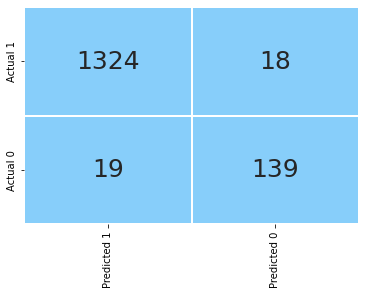

In [48]:
cm = confusion_matrix(y_test, y_pred_default1)

conf_matrix = pd.DataFrame(cm,columns = ['Predicted 1','Predicted 0'], index = ['Actual 1','Actual 0'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False,
           linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(rotation = 90)
plt.yticks(rotation = 90)
plt.show()

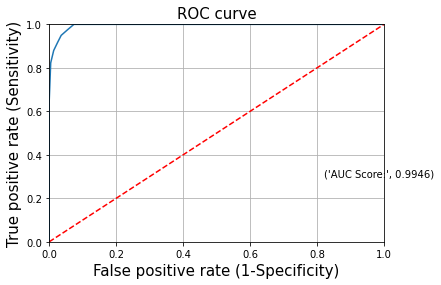

In [49]:
def plot_roc(model):
    y_pred_prob = dt_default1.predict_proba(X_test)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)
    
plot_roc(dt_default1)    

# Feature importance 

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.58911
Feature: 2, Score: 0.12153
Feature: 3, Score: 0.08760
Feature: 4, Score: 0.20175
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000


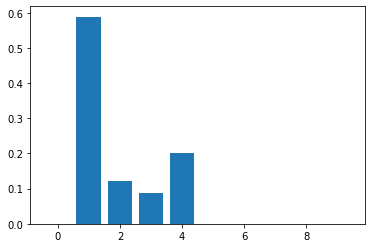

In [50]:
# get importance
importance = dt_default1.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Inferences :

1. The base model built was random forest with the accuracy of 90%. but there was a huge misclassification for one category.
2. Using K-fold with grid search CV the best hyperparameters found out was max_depth=10 ,min_samples_leaf=50,                      min_samples_split=50 , criterion='entropy'.
3. When again random forest algo on the data set used along with the tuned hyperparameters, the accuracy was at 98%.
4. The Precision and Recall for both the classes were verry good. the misclassification was considerable.
5. While the untuned model was predicting very well for zero class, but for class 1 there was high misclassification.
6. The area under the curve found out to be 0.989, almost close to 1.
7. The 4 features important to our model was Income, Family, CCAvg, Education.
8. The income feature was most important to our model.



In [51]:
X = pd.get_dummies(X , drop_first=True)
import statsmodels.api as sm 
X = sm.add_constant(X)
logreg = sm.Logit(y, X).fit()

print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.128513
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4989
Method:                           MLE   Df Model:                           10
Date:                Wed, 06 Jul 2022   Pseudo R-squ.:                  0.5936
Time:                        01:27:07   Log-Likelihood:                -642.57
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -13.5401      0.598    -22.638      0.000     -14.712     -12.368
Exper

### Inferences :

1. As the random forest only chose 4 significant features, we had to check if the p_value for other features.
2. The experience and the Mortgage has high p_value, maaking them statistically insignificant.
3. As for the rest they have p-value < 0.05.
4. The pseudo r squared was at 60%. With the feature elimination it will also be higher.

In [52]:
# Scripted By : Tanay Dusad